This notes is a taken from other sources and was modified by me to make the readability a lot easier

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')

# all these graphs can be configured to various sizes by

plt.figure(figsize=(12,8))

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

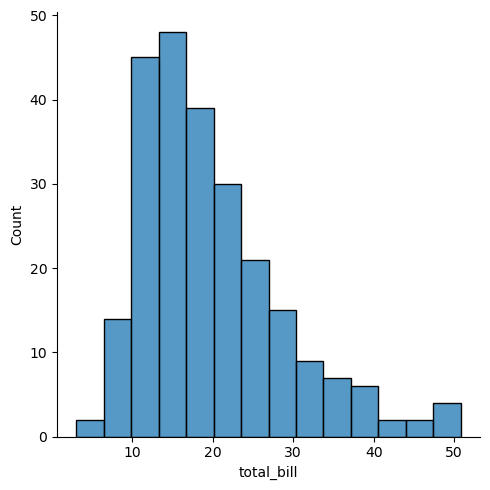

In [4]:
sns.displot(tips['total_bill'])
# Safe to ignore warnings

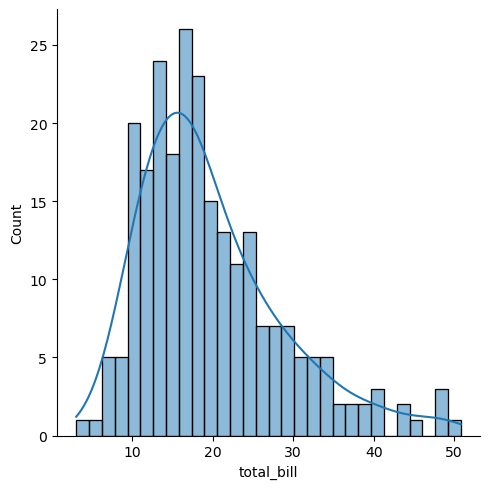

In [10]:
sns.displot(tips['total_bill'],kde=True,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

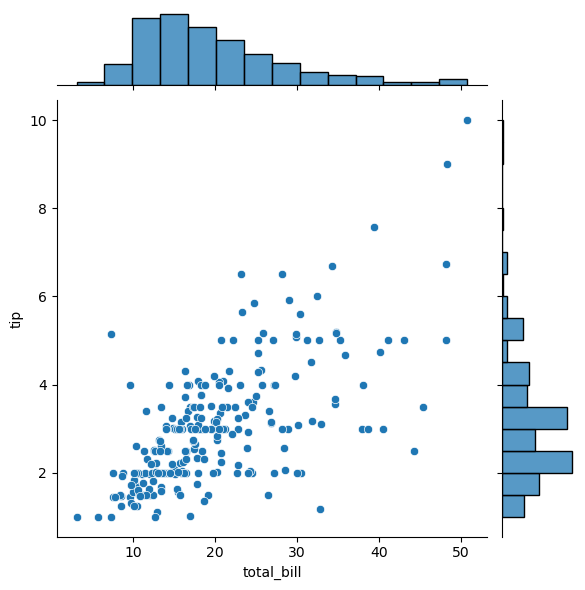

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
plt.show()

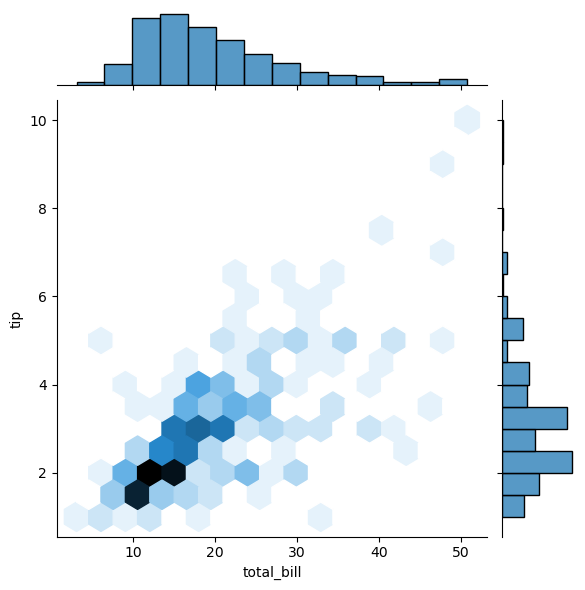

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

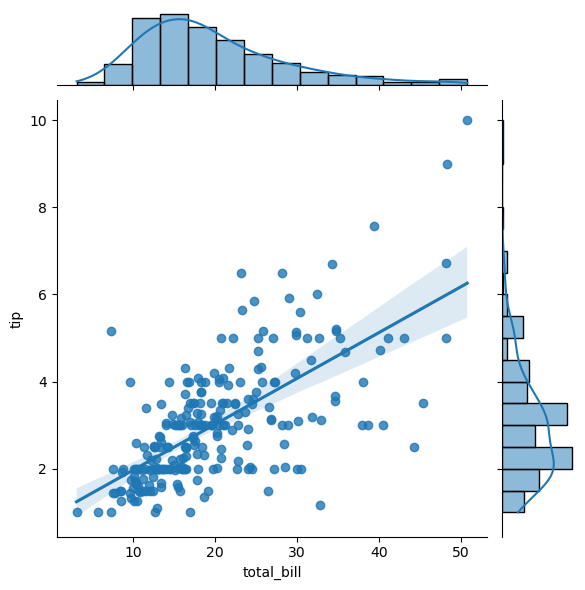

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot (Not recommended)

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

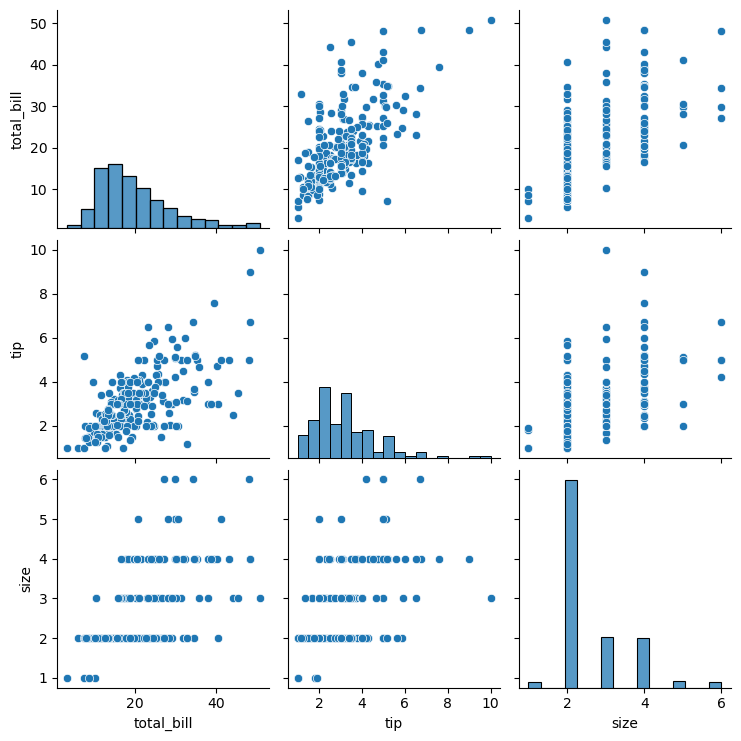

In [17]:
sns.pairplot(tips)

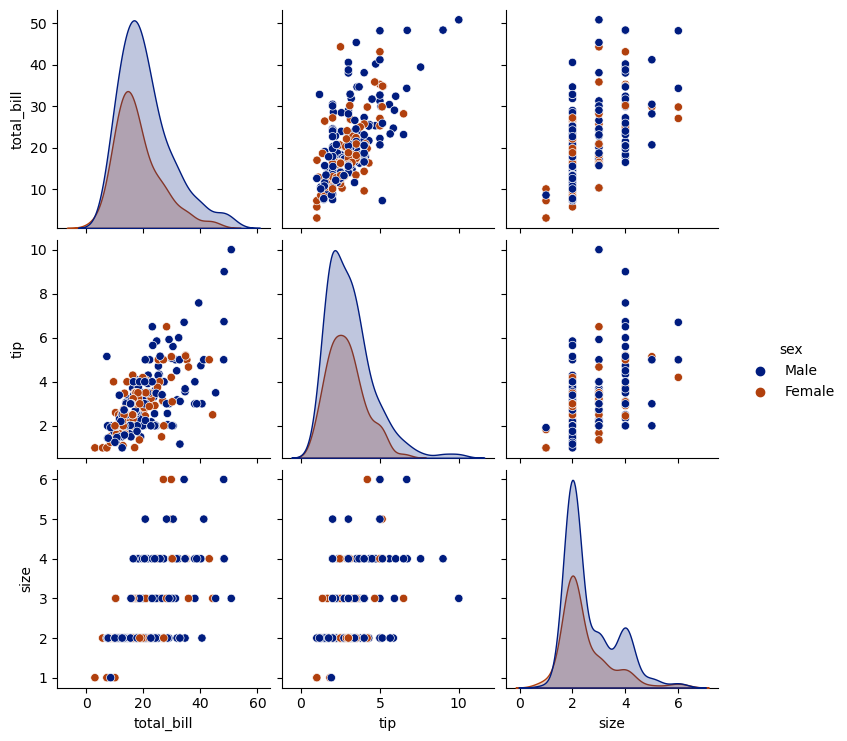

In [19]:
sns.pairplot(tips,hue='sex',palette='dark')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

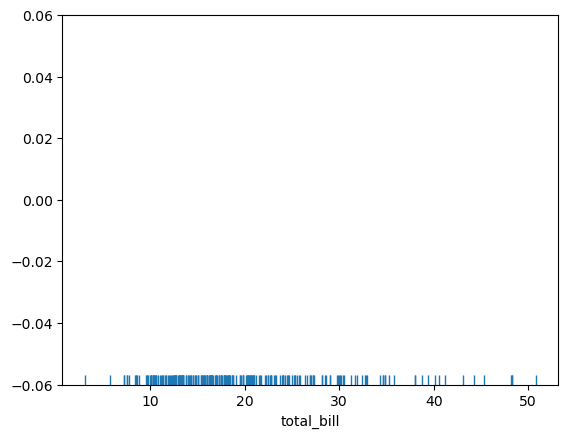

In [20]:
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

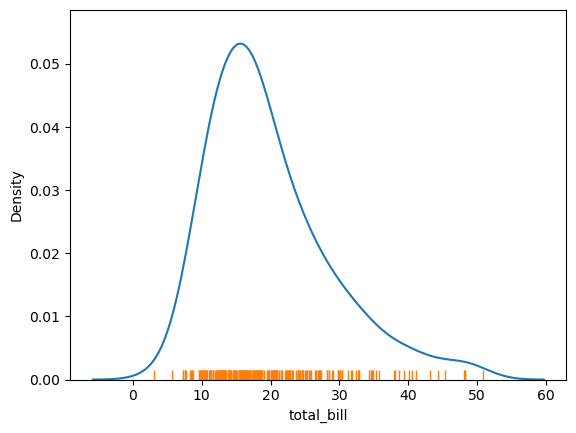

In [38]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

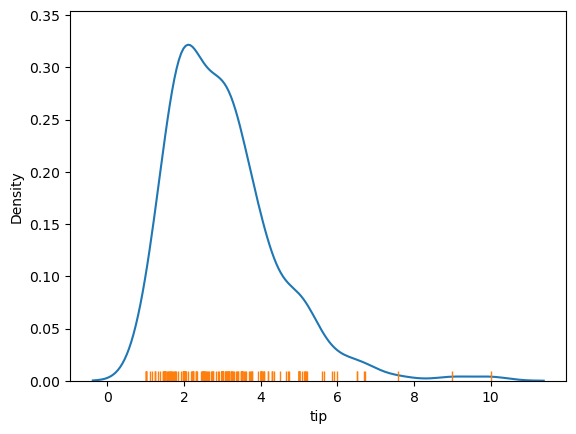

In [39]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

# barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

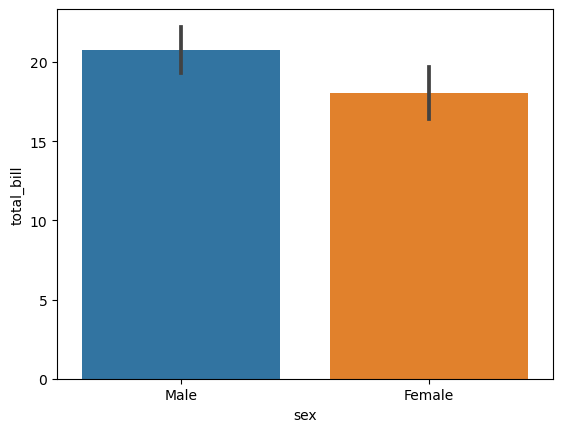

In [40]:
sns.barplot(x='sex',y='total_bill',data=tips)

<Axes: xlabel='sex', ylabel='total_bill'>

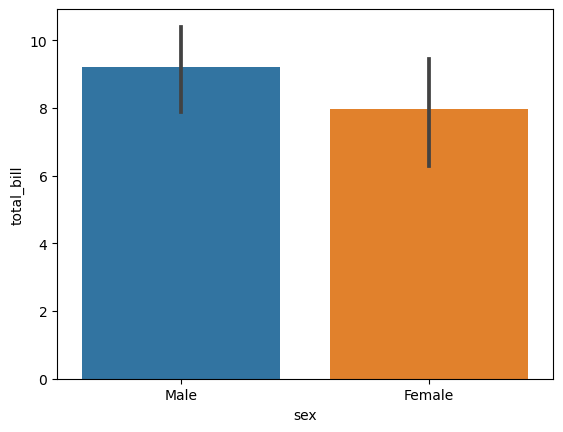

In [41]:
#not imp
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

# countplot



<Axes: xlabel='sex', ylabel='count'>

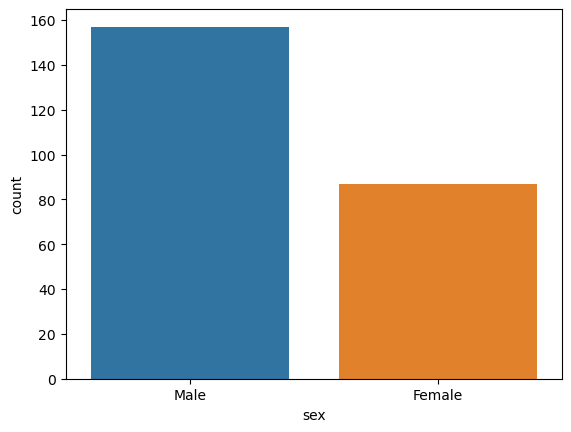

In [42]:
sns.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

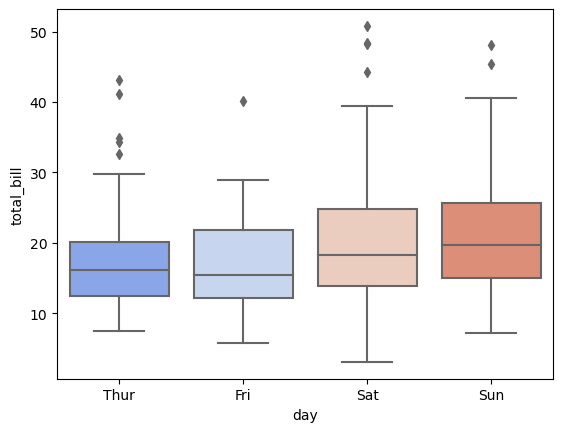

In [43]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='coolwarm')

<Axes: >

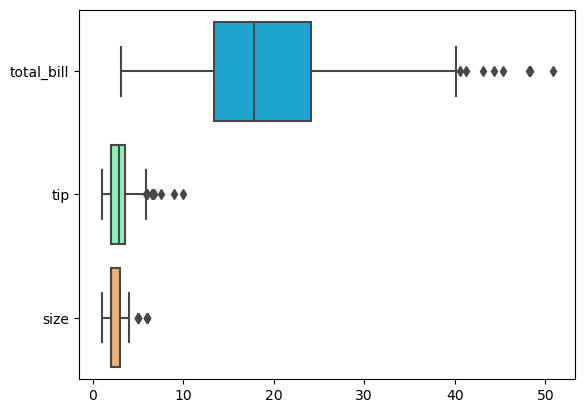

In [30]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

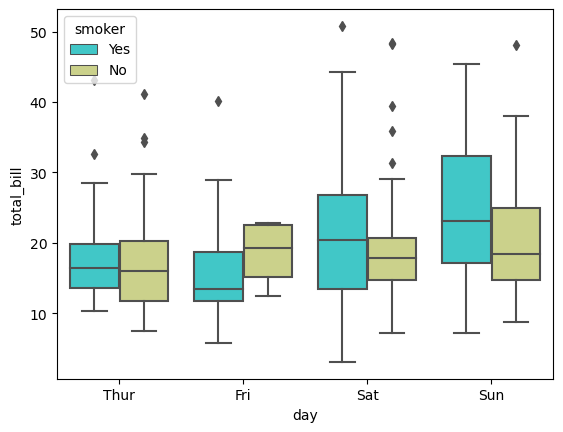

In [32]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips,palette='rainbow')

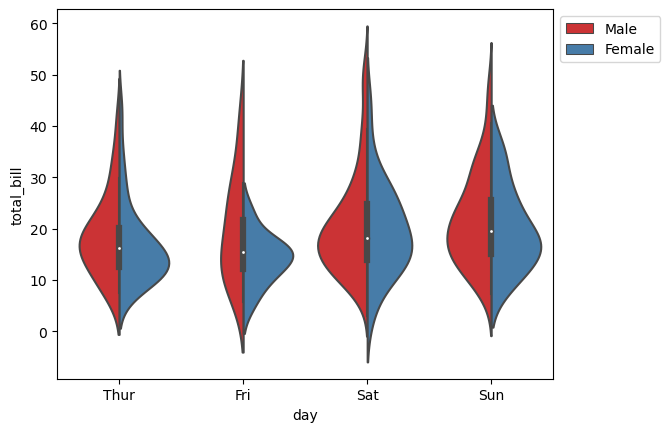

In [54]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

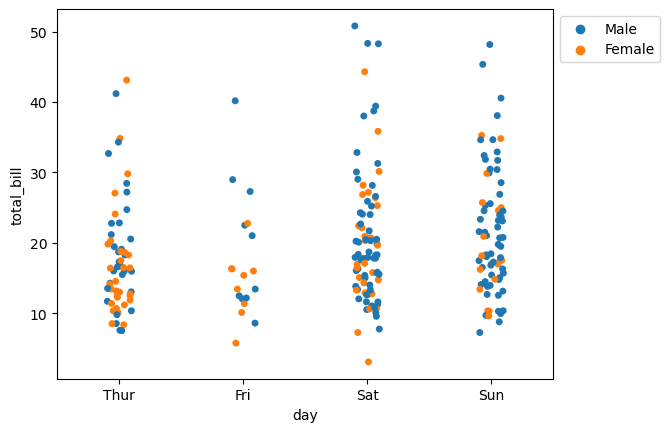

In [55]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex')
#for legend to be outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data 

In [56]:
flights=sns.load_dataset('flights')

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [65]:
tips[['total_bill', 'tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [69]:
#or
x=tips.select_dtypes(include='number').corr()

<Axes: >

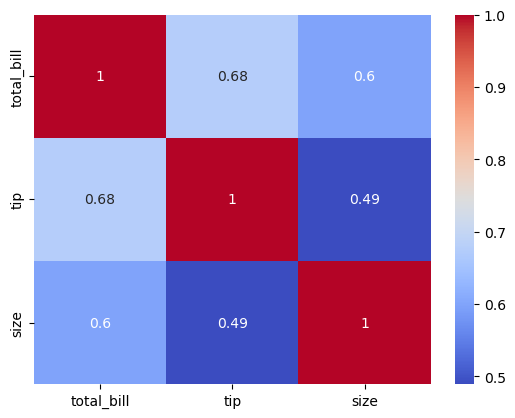

In [74]:
sns.heatmap(x,cmap='coolwarm',annot=True)

In [81]:
y=tips.pivot_table(index='day',columns='sex',values='total_bill')

In [82]:
y

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


<Axes: xlabel='sex', ylabel='day'>

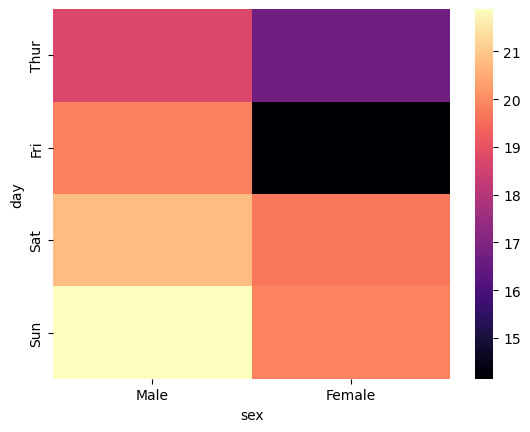

In [85]:
sns.heatmap(y,cmap='magma')

In [87]:
fl=flights.pivot_table(index='month',columns='year',values='passengers')

In [88]:
fl

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

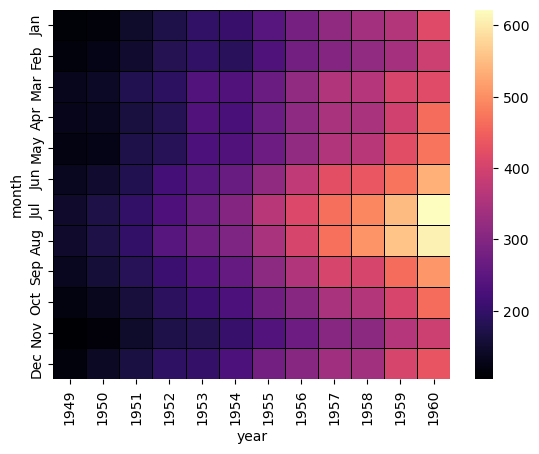

In [89]:
sns.heatmap(fl,cmap='magma',linecolor='black',linewidth=0.5)

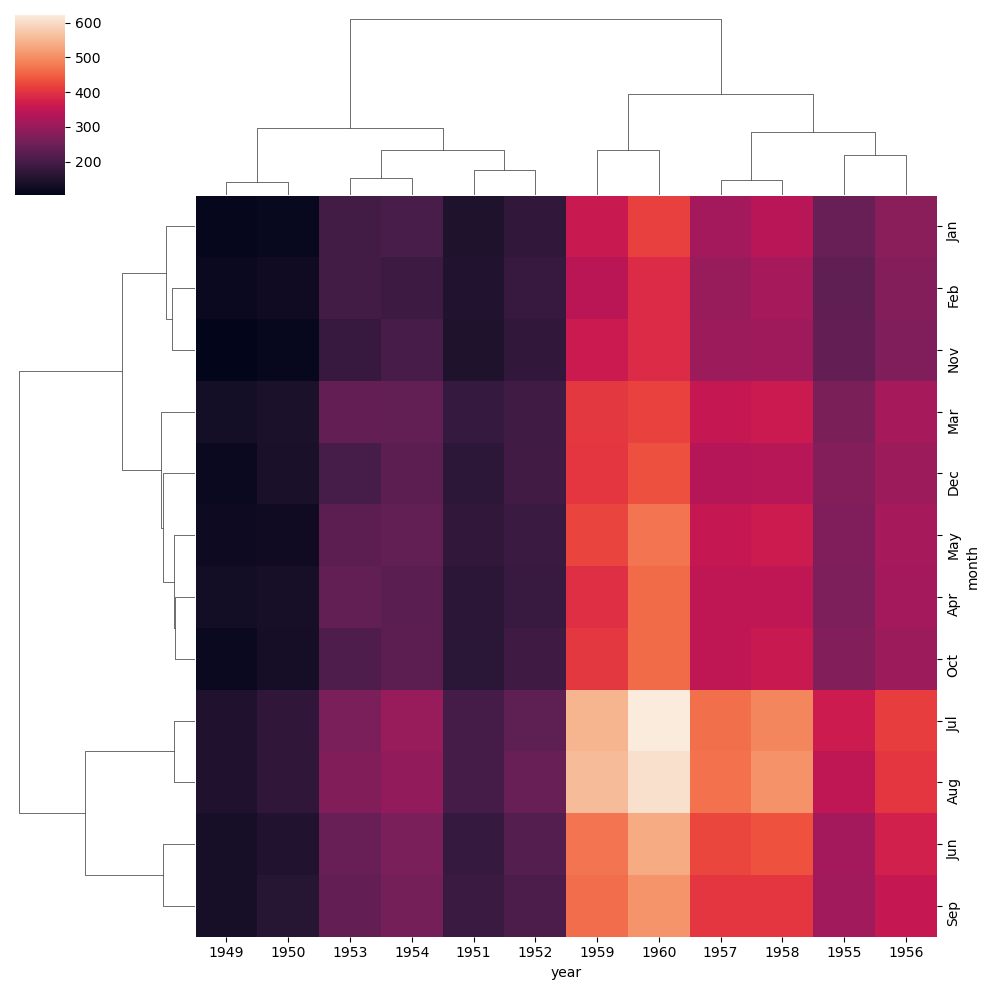

In [90]:
sns.clustermap(fl)

# Style and Color

<Axes: xlabel='sex', ylabel='count'>

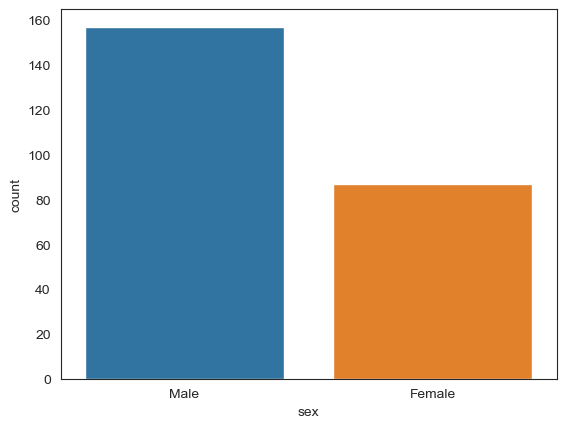

In [93]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

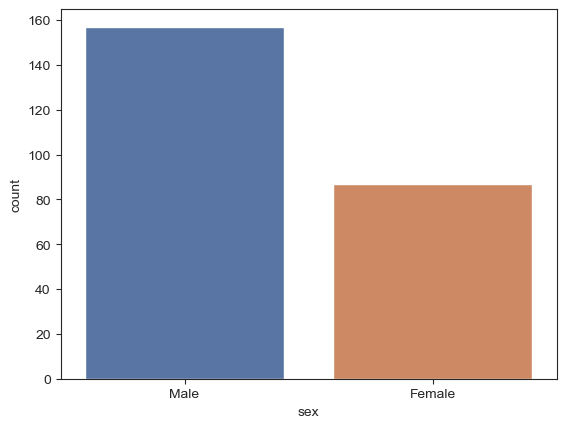

In [94]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

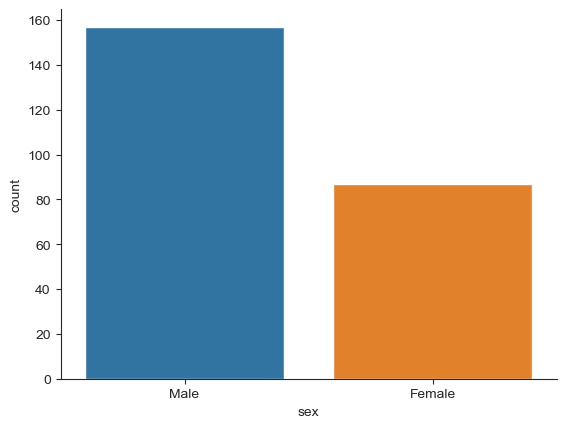

In [97]:
sns.countplot(x='sex',data=tips)
sns.despine()

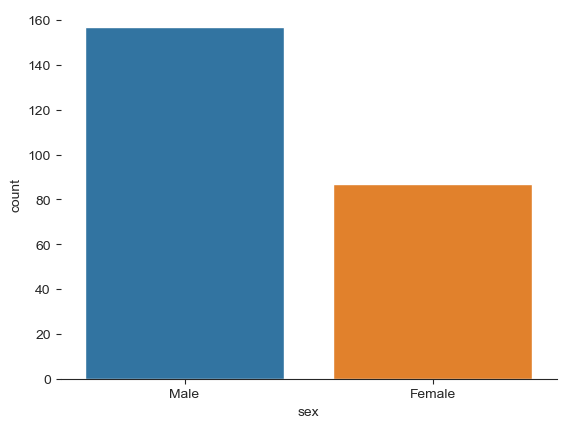

In [96]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

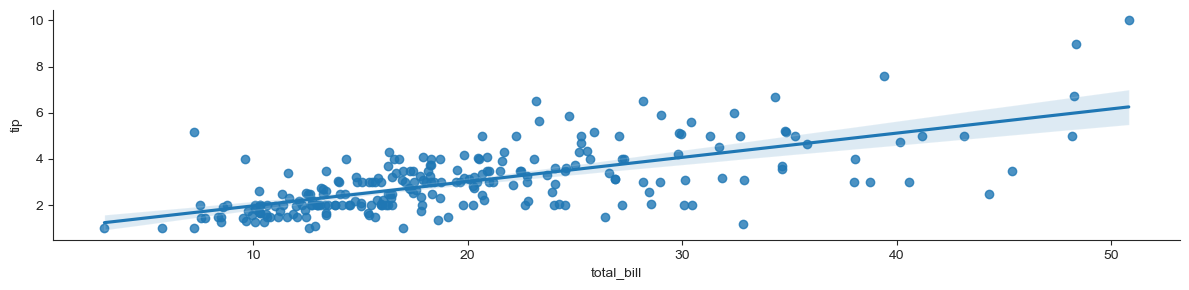

In [102]:
sns.lmplot(x='total_bill',y='tip',height=3,aspect=4,data=tips)

<Axes: xlabel='sex', ylabel='count'>

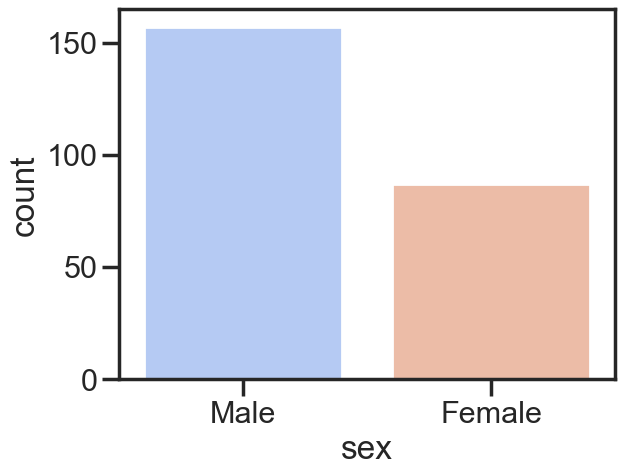

In [106]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips,palette='coolwarm')